In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download Data and basic information

In [26]:
data = pd.read_csv("Output/all_data.csv")
data = data.dropna()
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [27]:
data = data.convert_dtypes()
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"], errors="coerce")
data["Price Each"] = pd.to_numeric(data["Price Each"], errors="coerce")

# The best month for sales

In [28]:
data["Month"] = data["Order Date"].str[0:2]
data = data.loc[data["Month"] != "Or"]
data["Month"] = data["Month"].astype(int)

## Add column Sales and show Barplot

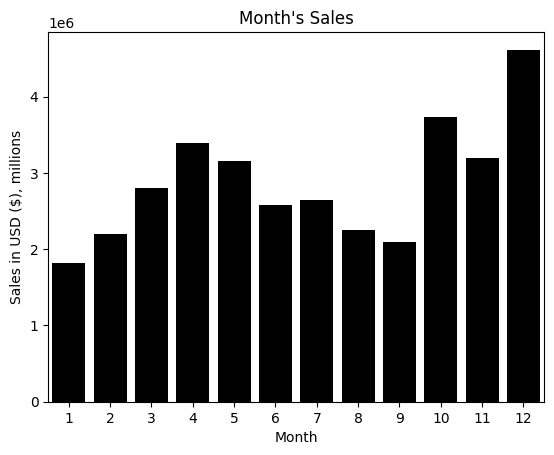

In [29]:
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]
month_sales_data = data.groupby("Month")["Sales"].sum()
month_sales_data.head()
bar = sns.barplot(x=month_sales_data.index, y=month_sales_data.values, color="black")
plt.xlabel("Month")
plt.ylabel("Sales in USD ($), millions")
plt.title("Month's Sales")
plt.show(bar)

In [30]:
print(f"The best sales was in December: {month_sales_data.max()}")

The best sales was in December: 4613443.34


# The best city-seller

## Add column City

In [31]:
def get_city(string):
    return string.split(", ")[1]

def get_state(string):
    return string.split(", ")[2].split(" ")[0]

data["City"] = data["Purchase Address"].apply(lambda x: f"{get_city(x)} {get_state(x)}")

## Show barplot and the best city-seller

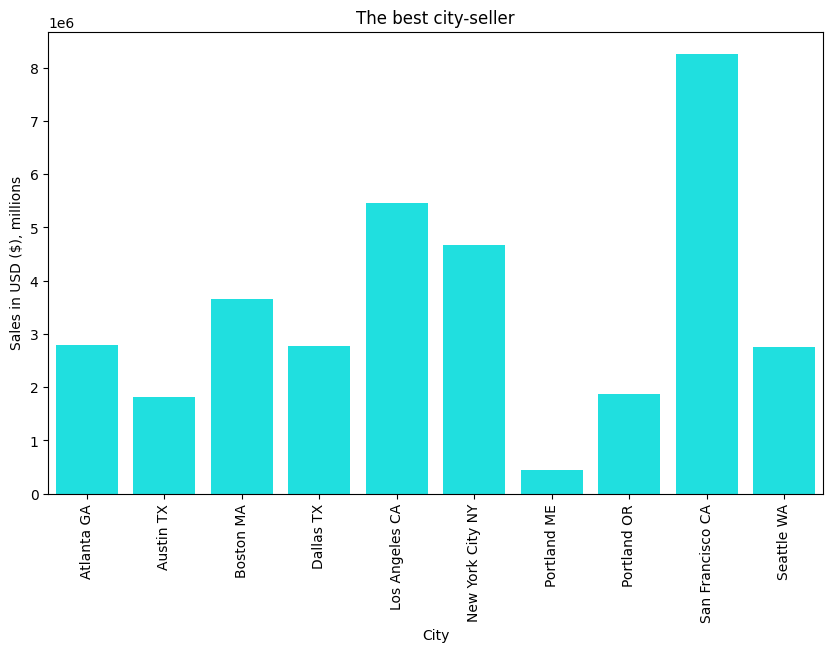

In [32]:
city_sales_data = data.groupby("City")["Sales"].sum()
fig, ax = plt.subplots(figsize=(10, 6))
city_bar = sns.barplot(x=city_sales_data.index, y=city_sales_data.values, color="cyan", ax=ax)
plt.xticks(rotation="vertical")
plt.xlabel("City")
plt.ylabel("Sales in USD ($), millions")
plt.title("The best city-seller")
plt.show(city_bar)

In [33]:
print(f"The best sales was in San Francisco: {city_sales_data.max()}")

The best sales was in San Francisco: 8262203.91


# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

## Add column Hour

In [34]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Hour"] = data["Order Date"].dt.hour
data["Minute"] = data["Order Date"].dt.minute

## Show lineplot with Hours

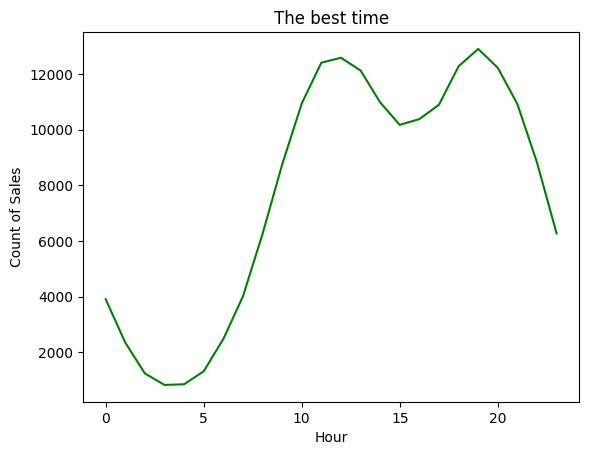

In [35]:
hours_maximize_data = data.groupby("Hour")["Hour"].count()
hours_lplot = sns.lineplot(x=hours_maximize_data.index, y=hours_maximize_data.values, color="green")
plt.xlabel("Hour")
plt.ylabel("Count of Sales")
plt.title("The best time")
plt.show(hours_lplot)

In [36]:
print(f"The best hour is {hours_maximize_data.idxmax()}")

The best hour is 19


# What products are most often sold together?

## Add column Group

In [37]:
groups_data = data.loc[data["Order ID"].duplicated(keep=False)]
groups_data["Group"] = data.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
groups_data = groups_data[["Order ID", "Group"]].drop_duplicates()
groups_data.head()

C:\Users\Руслан\AppData\Local\Temp\ipykernel_19212\4152910667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groups_data["Group"] = data.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


,Order ID,Group
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


## Count combinations of products

In [38]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in groups_data["Group"]:
    row_list = row.split(", ")
    count.update(Counter(combinations(row_list, 2)))

best_combinations = count.most_common(10)
for group, sales in best_combinations:
    print(group, sales)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# What product sold the most?

C:\Users\Руслан\AppData\Local\Temp\ipykernel_19212\67246789.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered_data = products_data.sum().sort_values(by="Quantity Ordered", ascending=False)
C:\Users\Руслан\AppData\Local\Temp\ipykernel_19212\67246789.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_data = products_data.mean()["Price Each"].reindex(quantity_ordered_data.index)


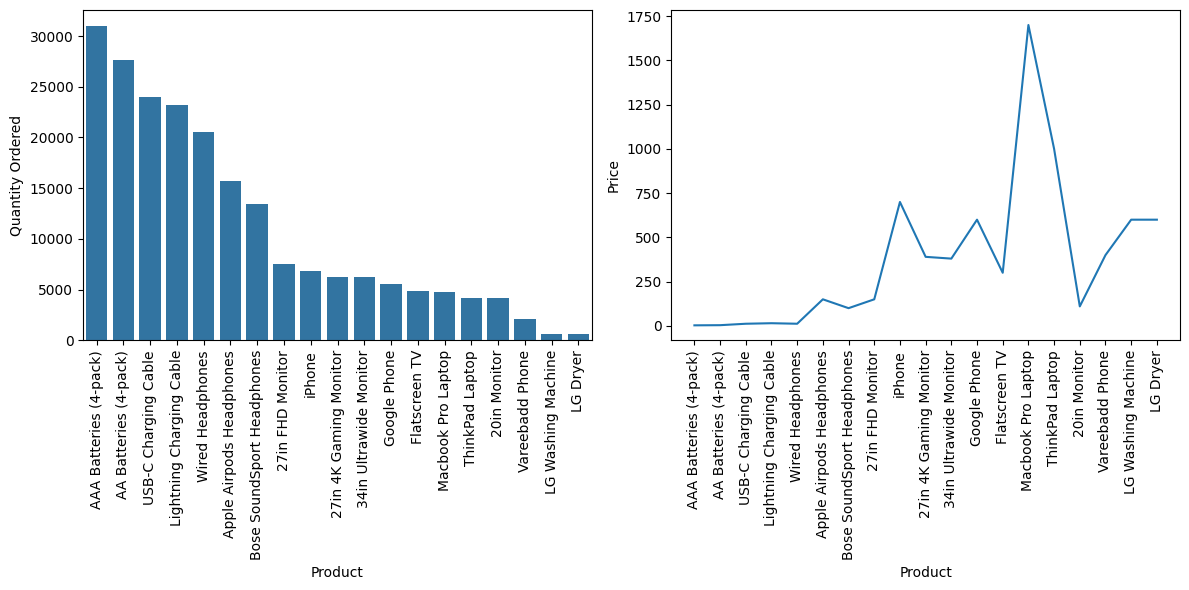

In [55]:
products_data = data.groupby("Product")
quantity_ordered_data = products_data.sum().sort_values(by="Quantity Ordered", ascending=False)
price_data = products_data.mean()["Price Each"].reindex(quantity_ordered_data.index)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=quantity_ordered_data.index, y=quantity_ordered_data["Quantity Ordered"])
plt.xticks(rotation="vertical")
plt.subplot(1, 2, 2)
lineplot = sns.lineplot(x=price_data.index, y=price_data.values)
lineplot.set_ylabel("Price")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show(quantity_bar)